<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="../Log_SA.jpeg"></a>

Instructor and author: [_Dr. Junaid Qazi_](https://www.linkedin.com/in/jqazi/)

# Support Vector Machines (SVMs) - Hands-on

Hi Guys,<br>

Welcome to the Support Vector Machines lecture.<br>
As suggested in the theory lecture, we are going to work with a real dataset on [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data). <br>

<font style="font-size:12px;color:green;">&#9758; The dataset is available on kaggle and originally belong to [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Want to know more about the dataset, click here for [Relevant Papers](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and [detailed description](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names).<br></font>

We have worked with this dataset in our Logistic Regression and KNN as well. If we use same features in SVM model, this will allow you to compare the performance of different classification algorithms. However, the goal is to learn little more at this stage. You can always use same features for direct comparisons.<br>
At this stage of the course, I am sure that you guys are feeling very comfortable with writing functions, doing data analysis and training machine learning algorithms.<br>
This time, we are given a data file `(.csv)` and another file `(.txt)` which contains features names, this is a common practice when you have large number of feature in your data.<br>
Let's start with writing a function to read features from the given `.txt` file and then create a dataframe using `.cav.` data. 

&#9758; Although, breast cancer dataset can be loaded from Scikit-learn, but we will use our own data and features files to practice our skills.<br>
***You will notice that I may repeat the code, use different ways to get same values. This is all for your learning, so that we explore different available options!***<br>
First thing first, let's import some libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.3) # setting font size for the whole notebook
sns.set_style("white") # if you want to set the style

# Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Let's write a simple function that can read header for the dataset from a separate file. This header is a list of the features in our case which is provided as a text file. The function will return a list that can be sued as a columns wile reading datafile in the dataframe. 

In [2]:
def read_header(feature_names_link):
    """
    This is going to be the DocString for this function:
    This function will read the header, for 
    our data from the text file on github. The function will return a list 
    of feature names, that can be sued as columns while 
    reading data in a dataframe. 
    """
    filename=feature_names_link.split('/')[-1]
    list_ = [] # initializing a list 

    # open file and read the content in a list
    with open(filename, 'r') as FileHandle:
        for line in FileHandle:
            # remove linebreak which is the last character of the string
            currentLine = line[:-1]
            # add item to the list
            list_.append(currentLine)
    return list_

In [3]:
# Data and feature names links on git
data_link='''https://raw.githubusercontent.com/junaidqazi/\
DataSets_Practice_ScienceAcademy/master/Breast_Cancer_data_no_feature_names.csv'''
feature_names_link='''https://raw.githubusercontent.com/junaidqazi/\
DataSets_Practice_ScienceAcademy/master/features_names_Breast_cancer.txt'''

In [4]:
#Loading header file 
try:
    print("trying to read header using custom function read_header()")
    cols = read_header(feature_names_link)
    print("read header using custom function read_header()")
except: 
    print("custom function read_header() throw error!")
    cols=pd.read_csv(feature_names_link, names=['feature_names']).feature_names.tolist()
    print("read the header file as csv using pandas")
# passing column names from cols 
df = pd.read_csv(data_link, names = cols)
print("data is in dataframe df")

trying to read header using custom function read_header()
custom function read_header() throw error!
read the header file as csv using pandas
data is in dataframe df


In [5]:
# You can check the head, I am just avoiding here because we have 32 feature and it will be bigger output.
# df.head() 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null    float64
 13  area_worst                  569 non

Notice, we have 32 features and 569 datapoints. There is no missing data!<br>
It's a good idea to get summary statistics using `describe()`. 

In [7]:
# summary statistics -- Just grabbing for few selected columns to avoid larger output, you can try all features!
df.describe()[['radius_mean','radius_worst','texture_mean', 'perimeter_mean', 'concave_points_worst']]

,radius_mean,radius_worst,texture_mean,perimeter_mean,concave_points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.088799,880.583128
std,3.524049,24.298981,351.914129,0.079720,569.356993
min,6.981000,43.790000,143.500000,0.000000,185.200000
25%,11.700000,75.170000,420.300000,0.029560,515.300000
50%,13.370000,86.240000,551.100000,0.061540,686.500000
75%,15.780000,104.100000,782.700000,0.130700,1084.000000
max,28.110000,188.500000,2501.000000,0.426800,4254.000000


Notice that the `texture_mean` got `~ 654 mean`, `~ 143 min` and `2501 max` value! We can look at other features, their `std`, `max`, `min` and `means` to get some idea on their distributions! *(Recall your high school statistics)*

**Note:** Although, we can consider ten real-valued features in this project for diagnostic. These are the most commonly used in studies, however, we are not going to do this in this lecture. If you want, here is the code to separate them:<br> `df = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]`

## Exploratory Data Analysis (EDA)

Well, we are already familiar with breast cancer dataset, still, it is good to refresh. <br>
Starting with `value_counts()` to see how many instances/datapoints we have in each target class.

In [8]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

I am going to add a new column `target` with category code (0/1) instead of (B/M). We may need it for ROC Curve!

In [9]:
df['target'] = df['diagnosis'].astype('category').cat.codes
df.target.value_counts() # 0 for B and 1 for M

0    357
1    212
Name: target, dtype: int64

In [10]:
# try the line below, just for recall, practice is good!
# df['target'].nunique(), df['target'].unique()

**It might be a good idea to see how `mean` and `median smoothness` for two type of cancer varies!**

In [11]:
M_type = df[df['diagnosis']=='M'] # or target == 1
B_type = df[df['diagnosis']=='B'] # or target == 0

In [12]:
print("Mean smoothness of M type:", round(M_type.smoothness_mean.mean(), 3))
print("Mean smoothness of B type:", round(B_type.smoothness_mean.mean(), 3))
print("Median smoothness of M type:", round(M_type.smoothness_mean.median(), 3))
print("Median smoothness of B type:", round(B_type.smoothness_mean.median(), 3))

Mean smoothness of M type: 4.324
Mean smoothness of B type: 2.0
Median smoothness of M type: 3.68
Median smoothness of B type: 1.851


**Visualizations are always helpful, let's get plots for `smoothness` and put `mean` and `median` values as legends**

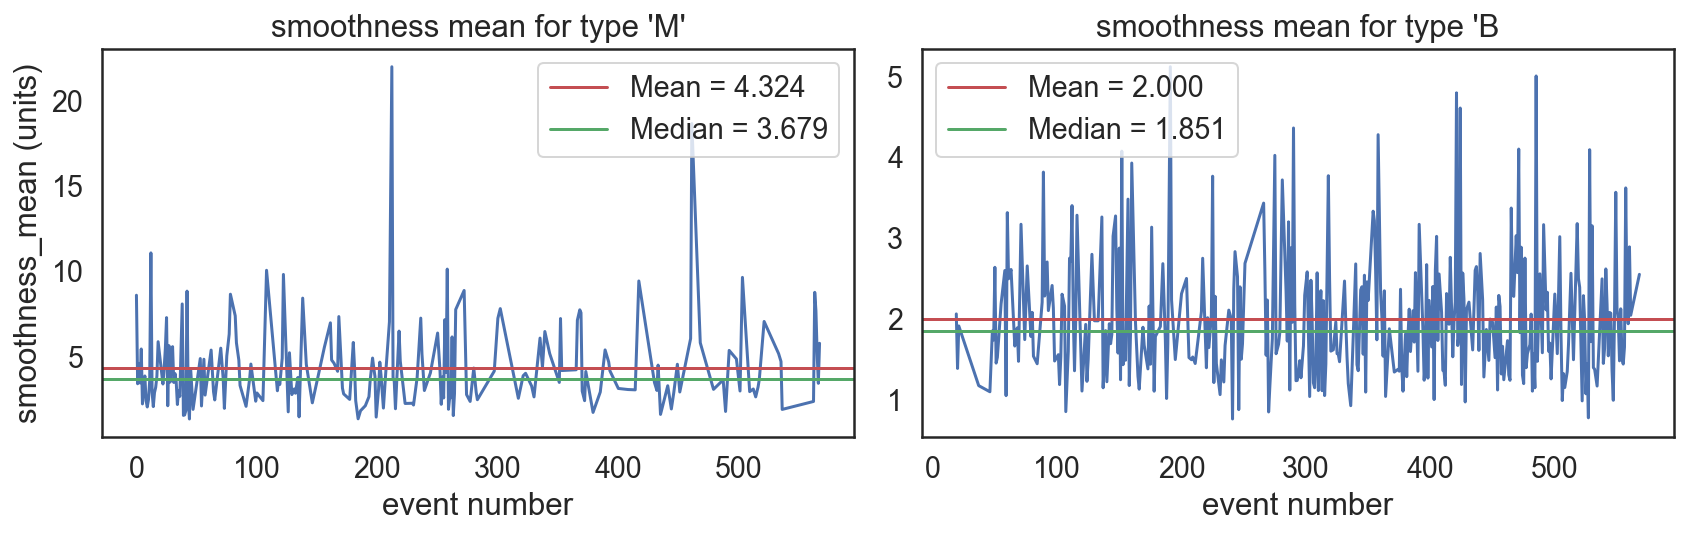

In [13]:
# Using subplots option (Object Oriented Approach), recall matplotlib lectures!
f, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 4))#, sharey = True)
ax1.plot(M_type.smoothness_mean)
ax2.plot(B_type.smoothness_mean)

# title and labels
ax1.set_title("smoothness mean for type 'M'")
ax2.set_title("smoothness mean for type 'B")
ax1.set_ylabel('smoothness_mean (units)')
ax1.set_xlabel('event number')
ax2.set_xlabel('event number')

# we can add lines along horizontal axis for mean and medians and also add values in legends! 
ax1.axhline(y=M_type.smoothness_mean.mean(), c = 'r', label = 'Mean = %.3f' %M_type.smoothness_mean.mean())
ax2.axhline(y=B_type.smoothness_mean.mean(), c = 'r', label = 'Mean = %.3f' %B_type.smoothness_mean.mean())
ax1.axhline(y=M_type.smoothness_mean.median(), c = 'g', label = 'Median = %.3f' %M_type.smoothness_mean.median())
ax2.axhline(y=B_type.smoothness_mean.median(), c = 'g', label = 'Median = %.3f' %B_type.smoothness_mean.median())

ax1.legend()
ax2.legend()
plt.tight_layout()

From the above plots, we can see that Type "M" of cancer has higher smoothness (both have different y scales). Red lines shows mean smoothness whereas green shows the medians. From the plot for type M, we notice that few points have significantly bigger values, potential outliers. Another thing, it is good idea to see the standard deviations as well, you can find std values for each measure in summary statistics as well (see above in `describe()`)

**Let's see, how the `mean` and `median compactness` for two type of cancers differ.**

In [14]:
# this is simply copy/paste of above code, only change is column name
print("Mean compactness of M type:", round(M_type.compactness_mean.mean(), 3))
print("Mean compactness of B type:", round(B_type.compactness_mean.mean(), 3))
print("Median compactness of M type:", round(M_type.compactness_mean.median(), 3))
print("Median compactness of B type:", round(B_type.compactness_mean.median(), 3))

Mean compactness of M type: 0.032
Mean compactness of B type: 0.021
Median compactness of M type: 0.029
Median compactness of B type: 0.016


**Let's copy the above code to create plots for compactness and put mean and median values as legends**

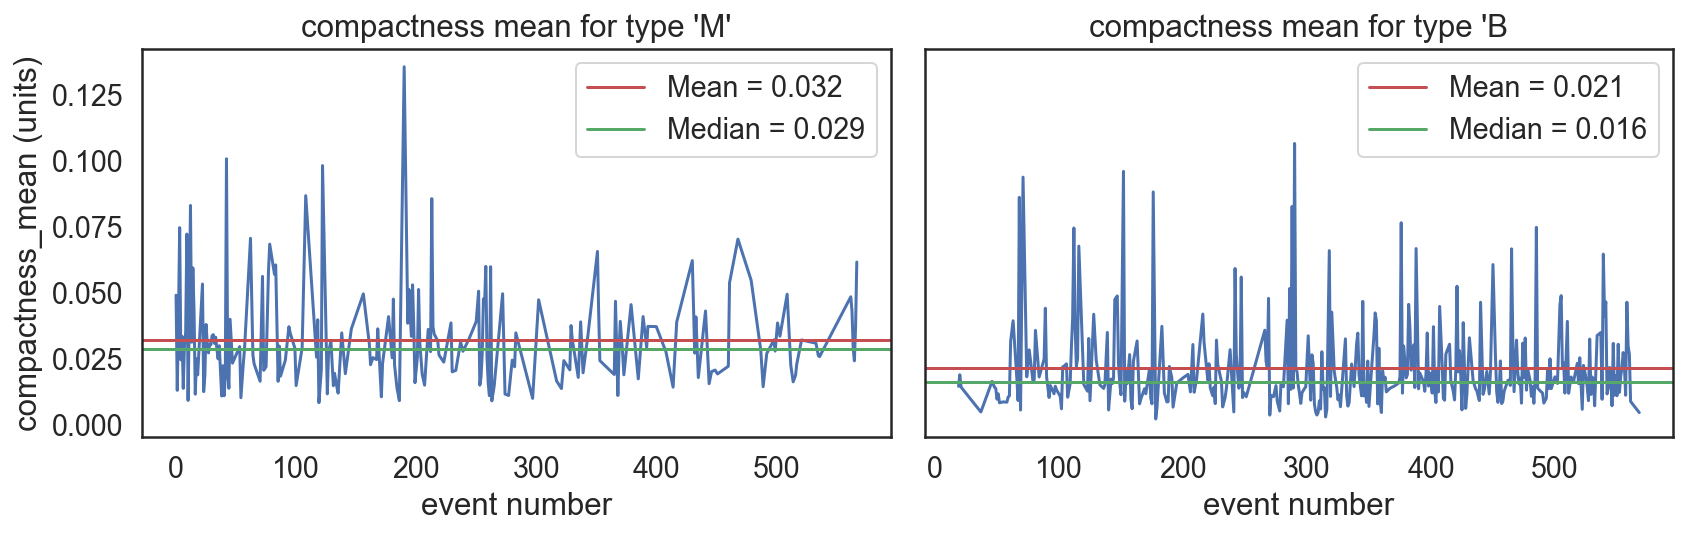

In [15]:
# Once again, this is simply copy/paste of above code, only change is column name
# Using subplots option (Object Oriented Approach), recall matplotlib lectures!
f, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 4), sharey = True)
ax1.plot(M_type.compactness_mean)#, label = 'M')
ax2.plot(B_type.compactness_mean)

# title and labels
ax1.set_title("compactness mean for type 'M'")
ax2.set_title("compactness mean for type 'B")
ax1.set_ylabel('compactness_mean (units)')
ax1.set_xlabel('event number')
ax2.set_xlabel('event number')

# we can add lines along horizontal axis for mean and medians 
ax1.axhline(y=M_type.compactness_mean.mean(), c = 'r', label = 'Mean = %.3f' %M_type.compactness_mean.mean())
ax2.axhline(y=B_type.compactness_mean.mean(), c = 'r', label = 'Mean = %.3f' %B_type.compactness_mean.mean())
ax1.axhline(y=M_type.compactness_mean.median(), c = 'g', label = 'Median = %.3f' %M_type.compactness_mean.median())
ax2.axhline(y=B_type.compactness_mean.median(), c = 'g', label = 'Median = %.3f' %B_type.compactness_mean.median())

ax1.legend()
ax2.legend()
plt.tight_layout()

Notes: Type "M" has higher compactness as compared to type B.

Let's drop all the error columns from our dataframe. We can use a for loop and create a list of columns accordingly.

In [16]:
cols_ = []
for item in df.columns:
    if 'error' not in item:
        cols_.append(item)
print(cols_)

['ID', 'diagnosis', 'radius_mean', 'radius_worst', 'texture_mean', 'texture_worst', 'perimeter_mean', 'perimeter_worst', 'area_mean', 'area_worst', 'smoothness_mean', 'smoothness_worst', 'compactness_mean', 'compactness_worst', 'concavity_mean', 'concavity_worst', 'concave_points_mean', 'concave_points_worst', 'symmetry_mean', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'target']


We have list of columns `"cols_"`, we can separate them now.

In [17]:
df = df[cols_] # separating columns we want to work with 

## Feature Selection
It's time to explore little more than what we have been doing in the previous lectures. Feature selection is one of the important process, especially when we are working with large number of features. Let. me introduce you to some common ways to select features based on statistical measures. <br>
***`(ANOVA (Analysis of variance)` and/or `chi2` are recommended for feature selection in classification problems)***.  
Before we move on, we need to do some imports; `SelectKBest()` which will return requested number of top features based on suggested statistics such as `chi2` or `ANOVA F-Value`. <br>
*Please refresh your basic knowledge on statistics from any fundamental book on statistics, wikipedia is also a great source for this purpose.* 

In [18]:
# Let's import the required modules first
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [19]:
# let's separate feature and target, we can use X and y notations as well! 
# notice different way of getting our purpose done! one line of code. 
features, target = df.drop(['ID', 'diagnosis','target'], axis=1), df['target']

### chi2
The Chi-Square statistic is widely used for testing relationships between categorical variables/features. In chi-statistics, the null-hypothesis states that there is no relationship on the categorical variables in the population, means they are independent. <br>
Using Chi-Square statistics, we can ask a question such as; <br>
* *Is there a significant relationship between voter intent and political party membership?*<br>

In scikit-learn, **chi2** computes Chi-Squared statistics between each non-negative feature and class.<br>

[Want to refresh, here is a **Good link on Chi-square statistics**](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/)<br>
[This link is very helpful to brush-up your understanding on **Hypothesis-testing**](https://statistics.laerd.com/statistical-guides/hypothesis-testing-3.php)

Let's move on and get the top 10 features using `SelectKBest()` with `chi2` statistics.

In [20]:
#features_selected_chi = SelectKBest(chi2, k=10).fit_transform(features, target)
#list(features_selected_chi[0])
features_selected_chi = SelectKBest(score_func=chi2, k=10).fit(features, target)
features_selected_chi#=features_selected_chi.fit(features, target)

SelectKBest(score_func=<function chi2 at 0x7faf5b112b80>)

So, `features_selected_chi` is an object somewhere in the memory at `0x1a........`. We can call `get_support()` on this object to get a mask for our k-best feature based chi-square statistics in this case.  

In [21]:
# Let's get the mask now!
k_best_feature_mask = features_selected_chi.get_support()
k_best_feature_mask

array([ True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
        True, False])

Now, we can use `k_best_feature_mask` to get names of best features, 10 features in our case as we passed `k = 10`. *(Recall boolean masking from python essentials)*

In [22]:
best_features_chi2 = list(features.columns[k_best_feature_mask])
print('list of 10 best features based on chi-square statistics:', best_features_chi2)

list of 10 best features based on chi-square statistics: ['radius_mean', 'radius_worst', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_worst', 'concave_points_mean', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_mean']


### ANOVA (Analysis of Variance) F-value 

ANOVA is a tool based on collection of statistical models and estimation procedures related to those models. Typically, it is used to splits an observed aggregate variability found inside a dataset into two parts: systematic factors and random factors. Systematic factors have a statistical influence on the given dataset, whereas Random factors do not. One can use ANOVA to explore the influence of independent variables on the dependent variable.<br>

The F-value in one way ANOVA helps to assess whether the expected values of a quantitative variable within several pre-defined groups differ from each other. In a typical example, ANOVA F-value (F-test) can be used to determine whether any of the treatments is on average superior or inferior (rejecting null-hypothesis) while comparing the medical trials of four treatments, the null-hypotheses is that all four treatments yields the same mean response. <br>
Another question that we can answer; "Is the variance between the means of two populations significantly different?"<br>

In scikit-learn **f_classif** computes the ANOVA F-value for the provided sample.<br>

[Need a re-fresh on ANOVA? this link could be a good read](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/anova/) and [This one is good as well](https://www.investopedia.com/terms/a/anova.asp)

Now, let's move on and selects the 10 best features based on `ANOVA F-value`. We only need to change the parameter `score_func` to `f_classif`, which is a default value and and only works with classification tasks. *(`<shift+tab>` to confirm from the docstring, they sometimes do the changes.)*  

In [23]:
# slecting top 10 features 
features_selected_f = SelectKBest(score_func=f_classif, k=10).fit(features, target)

# getting a list here -- masking (see above in chi2)
best_features_anova_f_value = list(features.columns[features_selected_f.get_support()])

# simply printing to see the names of the features 
print('list of 10 best features based on ANOVA F-value:', best_features_anova_f_value)

list of 10 best features based on ANOVA F-value: ['radius_mean', 'radius_worst', 'texture_mean', 'texture_worst', 'perimeter_mean', 'smoothness_mean', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_mean']


### Simple pairwise correlation
This is one of the most common measure that can be simply computed using pandas `.corr()` method *(compute pairwise correlation of columns, excluding NA/null values)*. The default method of calculation is the well known "Pearson Correlation".<br>

[Here is a good link to refresh Pearson correlation](https://statistics.laerd.com/stata-tutorials/pearsons-correlation-using-stata.php)<br>
[This one provide overview on Pearson, Kendall and Spearman](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/)

**Now, I want to give you a touch of slightly complex code in one line.**<br>
We are going to do the following operations in one line of code given below:
* dropping ID and diagnosis columns
* computing correlation -- default is Pearson -- `<shift+tab>` for `docstring` to explore
* grabbing `target` to see how the variables are correlated with target
* sorting the values 
* grabbing top 10 using slicing operation on index (recall you python essentials section)
* converting into a list (using `tolist()` here instead of passing to the `list()` method - good to know different ways)

*This will be little long line of code, I suggest you to break it into the steps and understand the process, it's good for your learning.*  

In [24]:
best_features_corr = df.drop(['ID', 'diagnosis'], axis=1).corr()['target'].sort_values(
    ascending=False).index[1:11].tolist()
print('list of 10 best features based pairwise correlation:\n',best_features_corr) # \n for new line in print!

list of 10 best features based pairwise correlation:
 ['fractal_dimension_mean', 'concavity_worst', 'radius_worst', 'concave_points_worst', 'radius_mean', 'texture_mean', 'perimeter_mean', 'symmetry_worst', 'texture_worst', 'smoothness_mean']


Well, if we look at top 10 features from the above three statistical measures, more of less, they return similar features in different order. What I am going to do, grabbing all union of all in a single list.<br>
Are you thinking about writing a function for union operation? Well, you can do this for your practice, but I do have a claver way of doing this at the moment! *(Recall your skills from Python Essentials)*<br>
We can concatenate all three lists of features using `+` operator, pass it to `set()` and then `list()` for this purpose! right?

In [25]:
selected_features = list(set(best_features_chi2 + best_features_anova_f_value + best_features_corr))
print('List of all features from chi2, f-value and corr: ', selected_features)

List of all features from chi2, f-value and corr:  ['smoothness_mean', 'symmetry_worst', 'fractal_dimension_mean', 'texture_worst', 'radius_mean', 'perimeter_mean', 'texture_mean', 'radius_worst', 'concave_points_worst', 'concavity_worst', 'concave_points_mean']


What is your opinion, is this a good idea to get correlation `heatmap` for `seleted_features` along with `target` now? I think it is a good idea!<br>
We don't have `target` in `selected_features`, its good idea to check this in python way (you could have a long list of features and it is not easy to read them all!) Once again, you skills from the previous lectures are useful!

In [26]:
'target' in selected_features # should return True is target is in the list!

False

Well, we can append `target` to `"selected_features"` and re-run the above line to re-confirm!

In [27]:
selected_features.append('target')

In [28]:
'target' in selected_features

True

All done for the `heatmap`, let use `seaborn` here!

<AxesSubplot:>

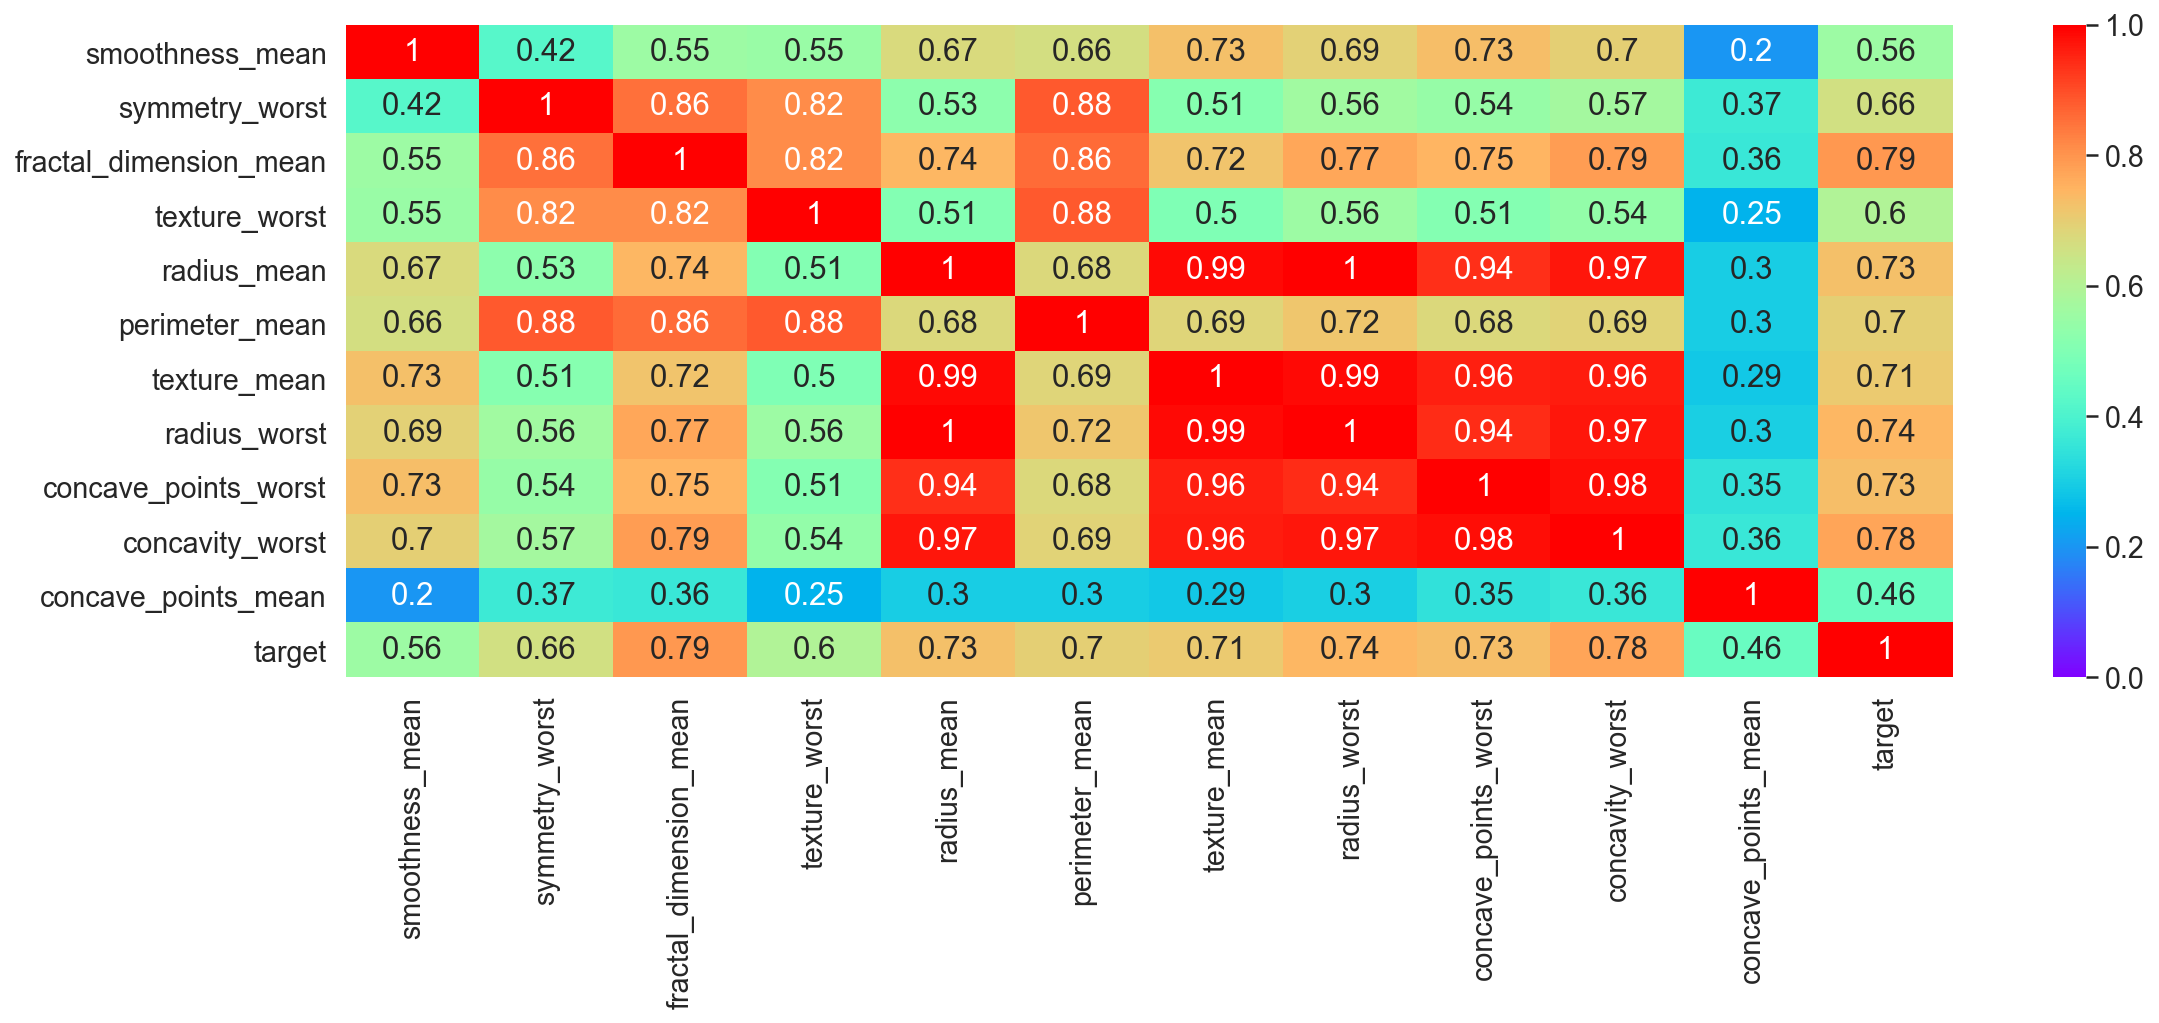

In [29]:
plt.figure(figsize=(18, 6))
corr = df[selected_features].corr()
sns.heatmap(corr, annot = True, vmin = 0, vmax = 1, cmap = 'rainbow')
# sns.heatmap(df[selected_features].corr(), annot = True, vmin = 0, vmax = 1, cmap = 'rainbow') # one liner

The above heatmap looks nice. We have lot's of information in it. Along diagonal, all values are 1 because correlation for any feature to itself will be 1. Heatmap shows the how the selected features are correlated to each others and to the targets, which is at the bottom in the map. 

we can use `pairplot` from `seaborn` to get the overall picture, that would be similar information (as in the heatmap) in different type of plots (scatter and kde). <br>
Here is the code for a pairplot for the selected features, in case you want to try!<br>
`sns.pairplot(df[selected_features], hue = 'target')`

***EDA is important and you can explore more. However, we are moving forward to train our SVM classifier, you can try more plots addressing different questions.***

## Machine Learning 

In the features selection, we have identified top 10 features using three different statistical measures. However, I am going to use all real valued features to train our model. You can try subset using chi2 or ANOVA and see the difference.

We have already separated features and targets in variables with same names. Instead of typical `X` and `y`, we can use them here.

### Train Test Split
I am sure, this is on your finger tips now!<br>

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=101)

Few steps that you can lead me through now!
* Importing classifier, 
* creating instance, 
* train `(fit)` the model on training data `(X_train, y_train)` 
* do the predictions for test data `(X_test, y_test)`
* evaluation, right? <br>

Let's do this step by step. Note, SVC (support vector classifier) is in the svm class!

### Importing and  training the Support Vector Classifier

In [31]:
# Importing SVC
from sklearn.svm import SVC

# Creating instance 'svm_model'
svm_model = SVC(probability=True)
# other than probabilities, using all default parameters. <shift+tab> for docstring

In [32]:
# training / fitting the model 
svm_model.fit(X_train,y_train)

SVC(probability=True)

In the above output from `.fit()`, we can observe that there are number of parameters such as `C`, `degree`, `gamma` `kernel` etc, we will come back and look at them in a while. We will tune the hyper-parameters!

### Predictions and Evaluation

In [33]:
# Guess what, time to do the predictions!
svm_pred = svm_model.predict(X_test)

Required imports. Once you get familiar with the process, a good idea is to do all imports at the beginning! 

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[114   3]
 [ 11  60]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       117
           1       0.95      0.85      0.90        71

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



Presentation could be improved, it's always good. Let's try for the confusion matrix.

In [36]:
df_matrix=pd.DataFrame(confusion_matrix(y_test, svm_pred), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
# We can set the background as well!
df_matrix.style.background_gradient(cmap='Reds')

,Predicted False,Predicted True
Actual False,114,3
Actual True,11,60


So, the above results are not good, our model is predicting all false and is not able to predict the Trues! SVM should do much better, even better than logistic regression and KNN in most of the cases.<br> 
Let's try Grid-Search and see if we can get improved model.

Now, another thing we need to explore is to find the best value of `C` and `gamma` parameters. We have seen their effect on some random dataset in the theory lecture. We need to run the grid search. 

### Grid-Search
**Recall: We did both Randomized-Search and Grid-Search in Random Forests, I am going to do Grid Search here, you can try Randomized yourself, should be very simple now!**<br>

Although, it is tricky but very important to find the right parameter so that the model work at its full. Grid-Search in one of the common way by creating a `"grid"` of parameters and try all the possible combinations to see which one works the best. Scikit-learn has a built-in capability to implement Grid-Search with [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)...We have already seen , it's great and simple, right :)<br> 
Important members of `GridSearchCV` are `fit` and `predict`. `GridSearchCV` takes a model instance and grid of the parameters, which is defined as a dictionary. In the dictionary, **keys** are the **parameters names** and the **values** are the **settings to be tested**.<br>

We have already discussed the most of the parameters and their importance in SVMs theory lecture. A quick overview on C and gamma is:<br>
**The C parameter** trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

**The gamma parameter** defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. <br>

The behavior of the model is very sensitive to the **gamma** parameter. If **gamma is too large**, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.<br>

When **gamma is very small**, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

Want to know more on the C and gamma parameters, see the [official documentation at scikit-learn with examples](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) 

&#9758; *Please go though the recommended reading to understand the mathematical concepts behind these parameters.*<br>
If you are interested in more practical use of Support Vector Machines (SVM), you can take a message that C and gamma parameters you can adjust using the Gridsearch. <br>


Ok, we need to find the best value of C and gamma. Let's create a `param_grid` to run the Grid-Search, along with C and gamma, I am going to add kernel as well.<br>

In [37]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1,0.1,0.01,0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 

In [38]:
# We need to import GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV

Let's create an instance and pass the following parameters:<br>
* **estimator** : estimator object `SVC()` in our case
* **param_grid** : dictionary or list of dictionaries. Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.
* **verbose** : integer -- Controls the verbosity: the higher, the more messages. If you don't pass any value to this, you will not see any message. Just to see if the Grid-Search process is working, its always good idea to see some output, hence good to pass some small number! Depending upon the number of parameters and their values, Grid-Search takes long time.

&#9758; *Another important thing to know about **`GridSearchCV`**. It **is a meta-estimator**. It takes an estimator like `SVC()`, and creates a new estimator, that behaves exactly the same - in this case, **`grid`** will behave same as `SVC()` classifier.*<br>

In [39]:
#shift+tab for doc string
grid = GridSearchCV(SVC(probability=True), param_grid, verbose=1) # 


As grid will behave same as `SVC()`, so, just like any other model, let's call `fit` on `grid` an pass in the training data. <br>
***The fit in this case does little more than the usual fit in any other model. First, the fit find the best parameter combination by running same loop with cross-validation. After getting the best parameters, it runs fit again on all data passed to fit (without cross-validation) and built a single new model using the best parameter setting.*** 

In [40]:
# Let's fit the data now
import time
start=time.time()
grid.fit(X_train, y_train)
print("Gridsearch took {} seconds.".format(round(time.time()-start,2)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Gridsearch took 441.92 seconds.


Note: The default cross validation, `cv`, is 3 (3 folds). I used `verbose=1` and did not get much in the output, try with value of 2 or 3 and see the difference! I actually did not want to populate the entire notebook!

Now, we have the best parameters combination in `grid` let see what is the best combination with best score.

In [41]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 1, 'kernel': 'linear'} with a score of 0.97


You can always explore other attributes on you trained model in `grid`. Let's see how the best estimator look like.

In [42]:
grid.best_estimator_ #grid.cv_results_

SVC(C=1, gamma=1, kernel='linear', probability=True)

### Predictions and Evaluation

We do the predictions in the same way as other models!

In [43]:
grid_pred = grid.predict(X_test)

And now the confusion matrix and the classification report and !

In [44]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       117
           1       0.95      0.87      0.91        71

    accuracy                           0.94       188
   macro avg       0.94      0.92      0.93       188
weighted avg       0.94      0.94      0.94       188



In [45]:
df_matrix=pd.DataFrame(confusion_matrix(y_test, grid_pred), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
# We can set the background as well!
df_matrix.style.background_gradient(cmap='Blues')

,Predicted False,Predicted True
Actual False,114,3
Actual True,9,62


So, the Grid-Search was very helpful, the model has shown significant improvements. <br>
* What else we can do, can we improve the results further? 
* Can we reduce the computation time for Grid-Search? 

What we can do, we can look at the summary statistics of our data once again and see how different the scales are for our features. <br>
Quickest way is to grab mean, min and max values of all the features and see how their range is varying. <br>
Once again, we can use `describe()` on `features` dataframe along with `transpose` and grab the required columns. (Code reference:KNN lecture with some changes)

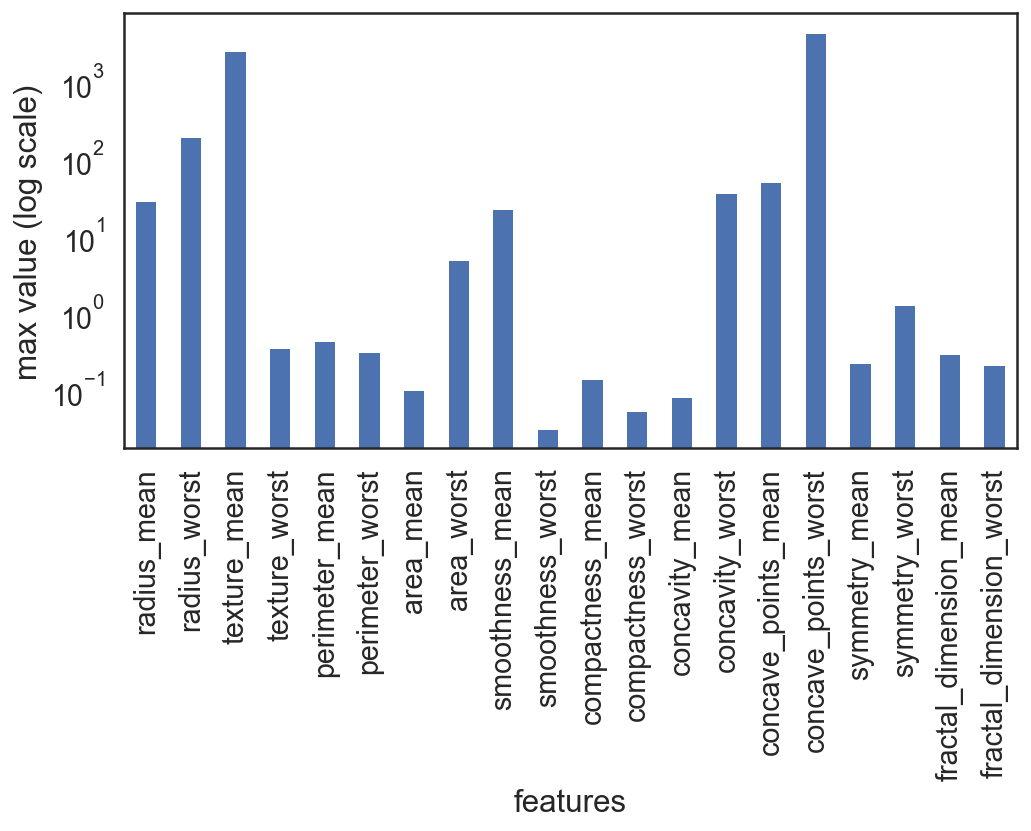

In [46]:
mean_min_max = features.describe().T[['mean', 'min', 'max']]
plt.figure(figsize=(8,4))
# getting bar plot of max values, try mean and min yourself, should be simple:)
mean_min_max['max'].plot(kind='bar')
plt.yscale('log')
plt.xlabel('features')
plt.ylabel('max value (log scale)');

From the above bar plot, we can see that there is significant variation in the range of the features. Some values are sufficiently larger than others. We know the importance of feature scaling and have seen the improvements in `KNN` lecture. <br>
Let's get the scaled features and re-train our `SVM` model. (Code reference: KNN lecture)

### Feature Scaling 

I am going to put couple of steps in a single cell, must be easier for you at this stage. 

In [47]:
# Importing StandardScaler and joblib, you can use pickle as well
from sklearn.preprocessing import StandardScaler
import joblib 

# Creating instance 'scaler'
scaler = StandardScaler()

# fitting on features
scaler.fit(features) # our features are in features

# Saving the transformation, a good ML practice
joblib.dump(scaler, 'scaling_transformation.pkl')
print('transformation saved as scaling_transformation.pkl')

# Loading saved transformation 
scaler = joblib.load('scaling_transformation.pkl') 
print('Saved transformation is loaded.')

# transforming features 
scaled_features = scaler.transform(features)
print('scaled features are in scaled_features')

transformation saved as scaling_transformation.pkl
Saved transformation is loaded.
scaled features are in scaled_features


**Let's split the data, train the model, get the predictions and print the confusion matrix, all in one cell of code.** 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.33, random_state=101)

In [49]:
# Let's fit the data now
start=time.time()
grid.fit(X_train, y_train)
print("Gridsearch took {} seconds.".format(round(time.time()-start,2)))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Gridsearch took 1.9 seconds.


In [50]:
grid_pred = grid.predict(X_test)

In [51]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       117
           1       1.00      0.93      0.96        71

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



In [52]:
df_matrix=pd.DataFrame(confusion_matrix(y_test, grid_pred), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
# We can set the background as well!
df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,117,0
Actual True,5,66


Excellent, the performance of our model is improved using scaled features. Another thing you want to notice, the computation time for the Grid-Search is much less than for scaled features as compared to the raw once. Think, what if you are working with large number of features and with 10 or even 100 times more data points? You want to save time!<br>
***A rule of thumb is, scale the features regardless of which model you are working with. If they don't have effects on the model, you will get the same results, if they model is sensitive to scaling, you will get improved results. In both the cases, you will significantly reduce the computation time.*** 

## ROC Curve
**I hope you can understand the code below at this stage!** 

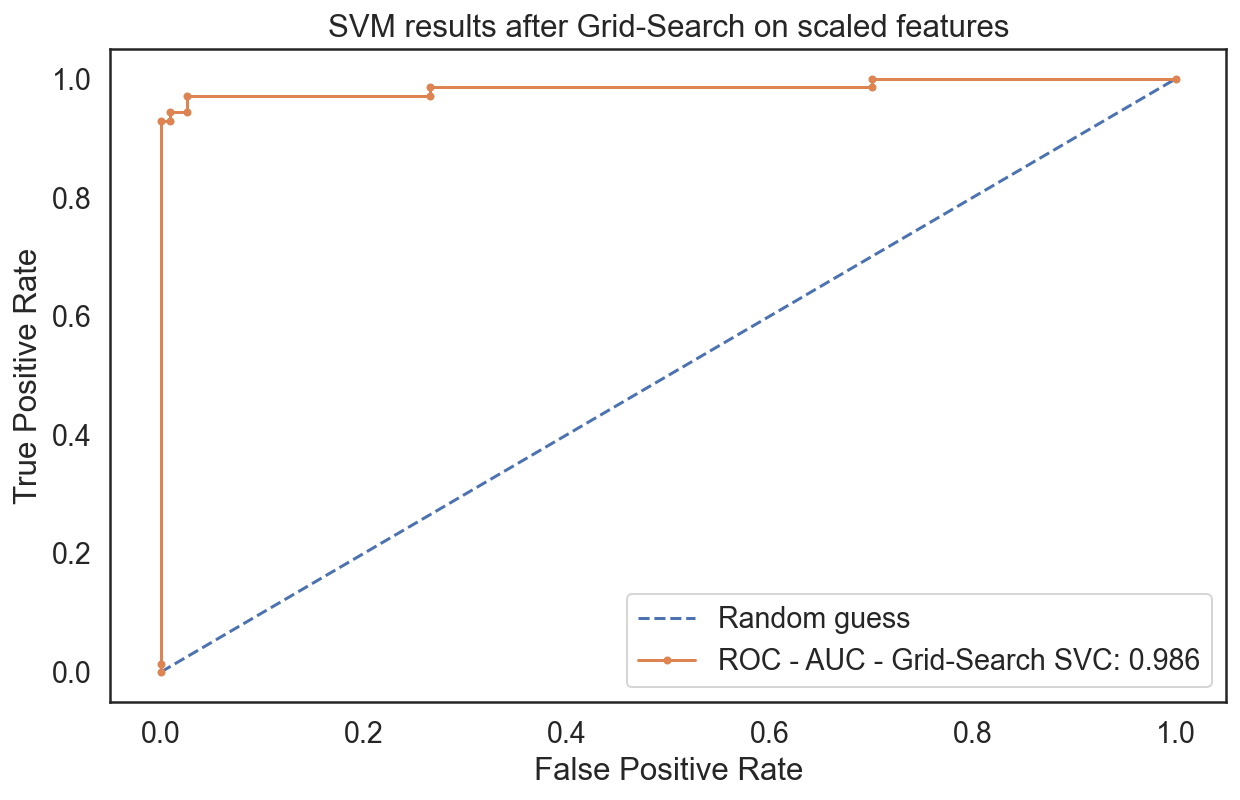

In [53]:
# Required imports from scikit-learn 
from sklearn.metrics import roc_curve, roc_auc_score

# Area Under the ROC Curve
grid_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]) 

# setting the figure size 
plt.figure(figsize = (10, 6)) 

# Computing Receiver operating characteristic (ROC)
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, grid.predict_proba(X_test)[:,1])

# plot no skill - A line for random guess
plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    
# ploting ROC Curve for skilled svm model 
plt.plot(fpr_grid, tpr_grid, marker='.', label = 'ROC - AUC - Grid-Search SVC: %.3f' % grid_auc)

# good to put title and labels
plt.title('SVM results after Grid-Search on scaled features')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
    
# putting the legends  
plt.legend();

During this SVM project, we have discussed lot's of important concepts along with the ways to improve the performance of our model and to make computation efficient. You can imagine the importance of Grid-Search, you may not be able to get an idea about the best values of your parameter (e.g. C and gamma here) without Grid-Search process. Keep it in your mind that the Grid-Search can take long time, especially for the large data sets and bunch parameters. It also depends upon your computer. <br>
The best way in the real life data projects is, to set the things up after cleaning your dataset. Do the Grid-Search on smaller set of grids (e.g. 1, 2 or 3) to make sure that it works correctly. Once you see things are working, then run it on full set of parameters with as many value as you want in the list for each of your parameters. <br>
In this way, you will save time as you know it worked on small set and will possible work on the full set of parameters. In the mean time, you can do something different!

***Excellent job, we have trained a good model using SVMs. <br>
Can you think about improving your model further?***

## To Do:
* Use subset of features that we have identified using chi2 and/or ANOVA and train your model. Compare your results. 
* Repeat your model with [**Recursive Feature Elimination (RFE)**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) from scikit-learn. It's super easy to implement. RFE select features by recursively considering smaller and smaller sets. *First, the model is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.*
* Repeat all of your algorithms, that you have learned in the previous lectures, after finding best subset of features using different ways, can you improve the performance of your trained models? Remember, the goal is to finalize well generalized and skillful model that can efficiently predict the unseen data.
* Re-train all the models that you have learned in the previous lectures using scaled features, create a summary report on your learning from this practice. 

***Now you can think, where do we spend all of our time, its not writing lots and lots of code at the end, its matter of finding the best available option!***

### Finalizing the model -- Same stuff, you can definitely save and load the model now! 
**Notice the difference, we need to save `grid` here!**

In [54]:
import pickle 

# save the model to disk
filename = 'final_model_SVM.sav'

# grid is our model, see above!
# file will be stored on the disk, see the working directory 
pickle.dump(grid, open(filename, 'wb')) # wb is stands for writing only in binary format

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

# let's do predictions using stored model after loading
predictions = loaded_model.predict(X_test)

# Let's pass the y_test and predictions to get the confusion_matrix
df_matrix=pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
# We can set the background as well!
df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,117,0
Actual True,5,66


## All done on SVM, Goof luck! Keep practicing!

# Extra Reading and resources: 

* [**Data Science from Scratch -- Part 1: Advance Analytics**](https://leanpub.com/data-science-from-scratch)

* [**Data Science from Scratch -- Part 2: Business Machine Learning**](https://leanpub.com/datascience-from-scratch-p2-business-machine-learning/c/r1W4Bml3Zqr6)


## License

Author: [___Dr. Junaid Qazi___](https://www.linkedin.com/in/jqazi/)<br>
Twitter: [***@JunaidSQazi***](https://twitter.com/JunaidSQazi)

Copyright 2021

Licensed under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0) (the "License").<br>you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

*Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Please see the License for the specific language governing permissions and limitations under the License.*


*This is not an official product but sample code provided for an educational purpose.*

***Acknowledgement is requested***